In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [75]:
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize']=(12,5)
plt.rcParams['axes.grid']=False
plt.rcParams['font.size']=10
plt.rcParams['font.style']='normal'

In [78]:
df = pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0,  parse_dates=True)

In [79]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [81]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


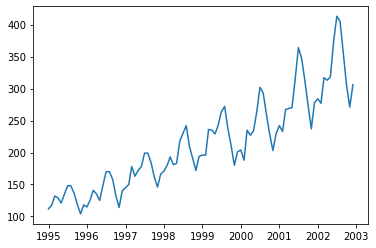

In [82]:
plt.plot(df)

In [84]:
## Observations
## 1. Trend - Upward Trend in forward direction
## 2. Seasonality - Presence of Seasonal components which is repeating
## 3. Multiplicative model

## Stationary Check

In [86]:
#Determing rolling statistics
moving_avg = df.rolling(window=12).mean()
moving_std = df.rolling(window=12).std()
print(moving_avg)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]


In [87]:
print(moving_std)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


Text(0, 0.5, 'no.of passengers')

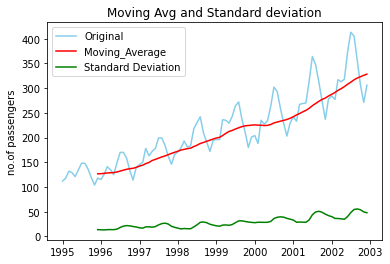

In [88]:
## Stationary check using rolling statastics
actual = plt.plot(df,color= 'skyblue',label='Original')
mean = plt.plot(moving_avg,color = 'red', label = 'Moving_Average')
std= plt.plot(moving_std,color='green', label='Standard Deviation')
plt.legend(loc='best')
plt.title('Moving Avg and Standard deviation')
plt.ylabel('no.of passengers')

#### As per the visualisation above, the moving average and Standard Deviation are not constant

## ADF(Audumented Dickey fuller) test to perform Stationnarity check

In [89]:
from statsmodels.tsa.stattools import adfuller
print('Results od ADF Test: ')
print('NUll hypothesis(H0): Data is not Stationary')
print('Alternate hypothesis(H0): Data is Stationary')
dftest = adfuller(df.Passengers,autolag='AIC')
dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags used','no of observations used'])
for key,value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value
print(dfoutput)

Results od ADF Test: 
NUll hypothesis(H0): Data is not Stationary
Alternate hypothesis(H0): Data is Stationary
Test Statistic              1.340248
p-value                     0.996825
lags used                  12.000000
no of observations used    83.000000
Critical value (1%)        -3.511712
Critical value (5%)        -2.897048
Critical value (10%)       -2.585713
dtype: float64


In [91]:
## p value is 0.99 which is higher than the significant level 0.05. therefore Data is not stationary
## Therefore mean and std are not constant

### Data Transformation from non-stationary to stationary
### Different Ways
#### 1.Log transformation
#### 2.subtracting simple moving average
#### 3.subtracting Exponential moving avg
#### 4.subtracting from previous value(shift)
#### 5.Seasonal Decomposition

In [96]:
## creating a customized function to test stationarity using rolling stats  and adf at once
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  ## Determing rolling statistics
  moving_avg = timeseries.rolling(window=12).mean()
  moving_std = timeseries.rolling(window=12).std()


  ## Ploting rolling statistics
  print('')
  print('Stationary Check')
  actual = plt.plot(timeseries,color= 'skyblue',label='Original')
  mean = plt.plot(moving_avg,color = 'red', label = 'Moving_Aveerage')
  std= plt.plot(moving_std,color='green', label='Standard Deviation')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard deviation')
  plt.show(block=False)

  ## perform ADF test


  print('Results od ADF Test: ')
  print('NUll hypothesis(H0): Data is not Stationary')
  print('Alternate hypothesis(H0): Data is Stationary')
  dftest = adfuller(timeseries,autolag='AIC')
  dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags used','no of observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

In [97]:
## Log Transformation

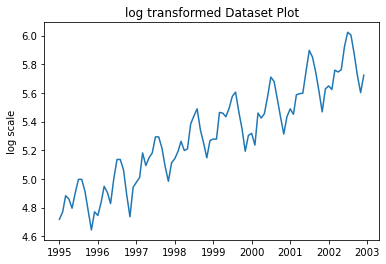


Stationary Check


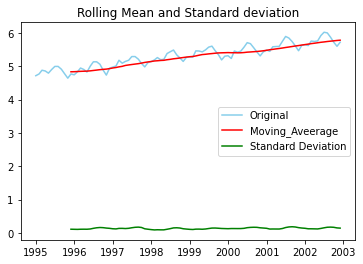

Results od ADF Test: 
NUll hypothesis(H0): Data is not Stationary
Alternate hypothesis(H0): Data is Stationary
Test Statistic             -0.723027
p-value                     0.840695
lags used                  12.000000
no of observations used    83.000000
Critical value (1%)        -3.511712
Critical value (5%)        -2.897048
Critical value (10%)       -2.585713
dtype: float64


In [98]:
df_log = np.log(df.Passengers)
plt.plot(df_log)
plt.title('log transformed Dataset Plot')
plt.ylabel('log scale')
plt.show()
test_stationarity(df_log)

In [99]:
## Data is not stationary pvalue>0.05

In [100]:
## subtracting simple moving average

Month
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
                ...   
2002-08-01    0.258591
2002-09-01    0.116062
2002-10-01   -0.041675
2002-11-01   -0.174313
2002-12-01   -0.060844
Name: Passengers, Length: 96, dtype: float64



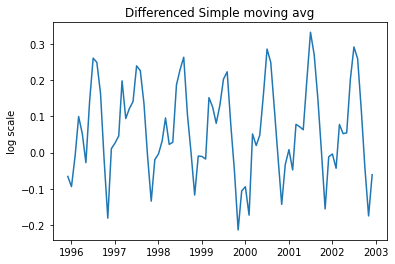


Stationary Check


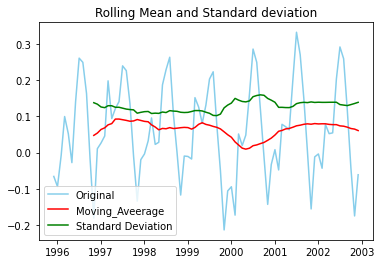

Results od ADF Test: 
NUll hypothesis(H0): Data is not Stationary
Alternate hypothesis(H0): Data is Stationary
Test Statistic             -1.910930
p-value                     0.326937
lags used                  12.000000
no of observations used    72.000000
Critical value (1%)        -3.524624
Critical value (5%)        -2.902607
Critical value (10%)       -2.588679
dtype: float64


In [101]:
### finding moving average of log transformed dataset and subtracting it from log trasformed values
df_log_moving_avg = df_log.rolling(12).mean()
df_log_difference = df_log - df_log_moving_avg
print(df_log_difference)

## Removing the nan or null values
df_log_difference.dropna(inplace = True)

## ploting the dataset after subtracting log transformed moving avg values from log trasformed values
print('')

plt.plot(df_log_difference)
plt.title('Differenced Simple moving avg')
plt.ylabel('log scale')
plt.show()

## Perform Stationary test
test_stationarity(df_log_difference)

In [102]:
## Data is stationary pvalue>0.05

In [103]:
## subtracting Exponential moving avg

Month
1995-01-01    4.718499
1995-02-01    4.745345
1995-03-01    4.793835
1995-04-01    4.811785
1995-05-01    4.808206
                ...   
2002-08-01    5.632166
2002-09-01    5.645696
2002-10-01    5.650087
2002-11-01    5.647383
2002-12-01    5.651677
Name: Passengers, Length: 96, dtype: float64
log transformed vs log transformed moving avg


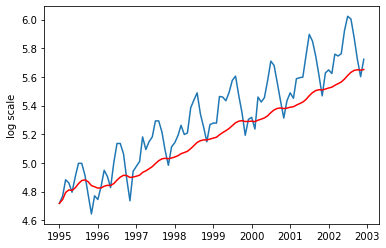

Differenced exponential moving avg
Month
1995-01-01    0.000000
1995-02-01    0.025339
1995-03-01    0.088967
1995-04-01    0.048028
1995-05-01   -0.012415
                ...   
2002-08-01    0.371721
2002-09-01    0.226422
2002-10-01    0.073498
2002-11-01   -0.045265
2002-12-01    0.071908
Name: Passengers, Length: 96, dtype: float64

Stationary Check


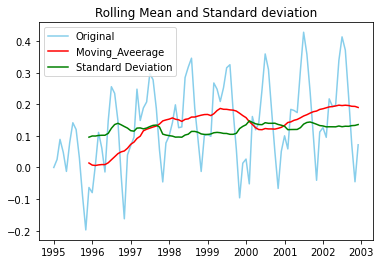

Results od ADF Test: 
NUll hypothesis(H0): Data is not Stationary
Alternate hypothesis(H0): Data is Stationary
Test Statistic             -2.835036
p-value                     0.053441
lags used                  12.000000
no of observations used    83.000000
Critical value (1%)        -3.511712
Critical value (5%)        -2.897048
Critical value (10%)       -2.585713
dtype: float64


In [104]:
## finding the exponential moving avg of log transformed data
df_log_ema = df_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
print(df_log_ema)

## visualizations
print('log transformed vs log transformed moving avg')
plt.plot(df_log)
plt.plot(df_log_ema,color='red')
plt.ylabel('log scale')
plt.show()

### subtracting the exponential moving avg from log transformed values
df_log_ema_difference = df_log - df_log_ema
print('Differenced exponential moving avg')
print(df_log_ema_difference)

## perform stationary test
test_stationarity(df_log_ema_difference)

In [106]:
## pvalue=0.05,We can conclude that the data is staionary

In [107]:
## subtracting from previous value(shift)

Month
1995-02-01    0.052186
1995-03-01    0.112117
1995-04-01   -0.022990
1995-05-01   -0.064022
1995-06-01    0.109484
                ...   
2002-08-01   -0.019561
2002-09-01   -0.131769
2002-10-01   -0.148533
2002-11-01   -0.121466
2002-12-01    0.121466
Name: Passengers, Length: 95, dtype: float64
log transformed vs log transformed shifted data


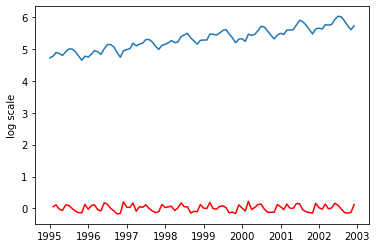


Stationary Check


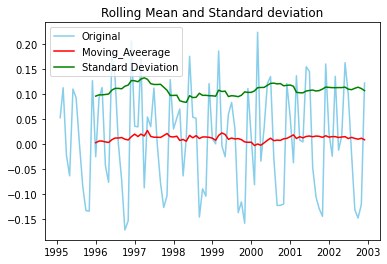

Results od ADF Test: 
NUll hypothesis(H0): Data is not Stationary
Alternate hypothesis(H0): Data is Stationary
Test Statistic             -2.670823
p-value                     0.079225
lags used                  12.000000
no of observations used    82.000000
Critical value (1%)        -3.512738
Critical value (5%)        -2.897490
Critical value (10%)       -2.585949
dtype: float64


In [108]:
## finding the exponential moving avg of log transformed data
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
print(df_log_shift)

## visualizations
print('log transformed vs log transformed shifted data')
plt.plot(df_log)
plt.plot(df_log_shift,color='red')
plt.ylabel('log scale')
plt.show()

## perform stationary test
test_stationarity(df_log_shift)

In [110]:
## Data not staionary since pvalue=0.07 which is grether than significant value
## In Order to make it stationary we can shift the value 4 periods in next step

Month
1995-05-01    0.077292
1995-06-01    0.134590
1995-07-01    0.114410
1995-08-01    0.137400
1995-09-01    0.116864
                ...   
2002-08-01    0.257684
2002-09-01    0.110066
2002-10-01   -0.200671
2002-11-01   -0.421329
2002-12-01   -0.280302
Name: Passengers, Length: 92, dtype: float64
log transformed vs log transformed shifted data


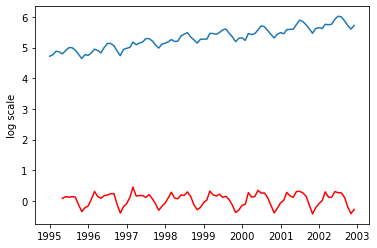


Stationary Check


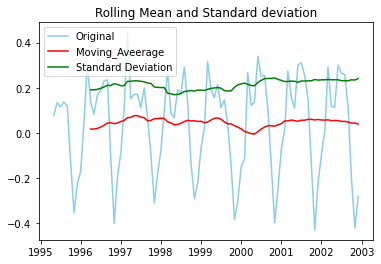

Results od ADF Test: 
NUll hypothesis(H0): Data is not Stationary
Alternate hypothesis(H0): Data is Stationary
Test Statistic             -2.803122
p-value                     0.057829
lags used                   9.000000
no of observations used    82.000000
Critical value (1%)        -3.512738
Critical value (5%)        -2.897490
Critical value (10%)       -2.585949
dtype: float64


In [111]:
## Subtracting present log scale values from its previous values
df_log_shift2 = df_log - df_log.shift(4)
df_log_shift2.dropna(inplace=True)
print(df_log_shift2)

## visualizations
print('log transformed vs log transformed shifted data')
plt.plot(df_log)
plt.plot(df_log_shift2,color='red')
plt.ylabel('log scale')
plt.show()

## perform stationary test
test_stationarity(df_log_shift2)

In [112]:
## We can conclude that dtaa is stationary since the p-value=0.05

## Seasonal Decomposition

plot showing decomposed data


Stationary Check


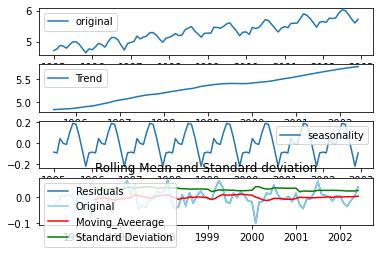

Results od ADF Test: 
NUll hypothesis(H0): Data is not Stationary
Alternate hypothesis(H0): Data is Stationary
Test Statistic            -5.907863e+00
p-value                    2.681970e-07
lags used                  3.000000e+00
no of observations used    8.000000e+01
Critical value (1%)       -3.514869e+00
Critical value (5%)       -2.898409e+00
Critical value (10%)      -2.586439e+00
dtype: float64


In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


print('plot showing decomposed data')

plt.subplot(411)
plt.plot(df_log,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

print('')
## Stationary test 

df_log_decomposed = residual
df_log_decomposed.dropna(inplace=True)

df_log_decomposed

test_stationarity(df_log_decomposed)

In [114]:
## Observations: As the p value obtained is lesser than the threshold value 0.05, we accept alternate hypothesis, it says data is stationary

## Finding the Lags in ARIMA and MA models

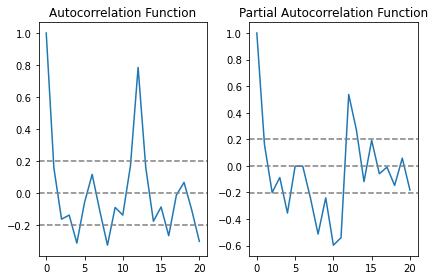

In [115]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA Model

Auto Regressive model Summary and plot
                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  83.875
Method:                       css-mle   S.D. of innovations              0.100
Date:                Tue, 30 Nov 2021   AIC                           -159.749
Time:                        15:21:36   BIC                           -149.534
Sample:                    02-01-1995   HQIC                          -155.621
                         - 12-01-2002                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0106      0.010      1.040      0.298      -0.009       0.031
ar.L1.D.Passengers     0.1925      0.101      1.903      0.057      

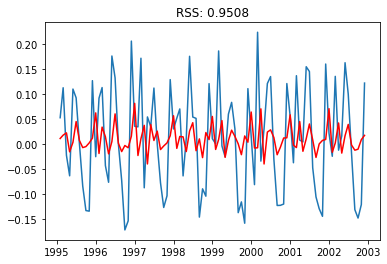

In [116]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(df_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_log_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log_shift)**2))
print('Auto Regressive model Summary and plot')
print(results_AR.summary())

In [117]:
## A Model is said to be good if the likelyhood of the model is higher and lower the AIC BIC better the model
## P value should be Significant <= 0.05
## Lower the RMSE Better the model

## Moving Average model

Auto Regressive model Summary and plot
                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  90.076
Method:                       css-mle   S.D. of innovations              0.092
Date:                Tue, 30 Nov 2021   AIC                           -172.153
Time:                        15:23:58   BIC                           -161.937
Sample:                    02-01-1995   HQIC                          -168.025
                         - 12-01-2002                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0112      0.001     18.977      0.000       0.010       0.012
ma.L1.D.Passengers    -0.2317      0.067     -3.434      0.001      

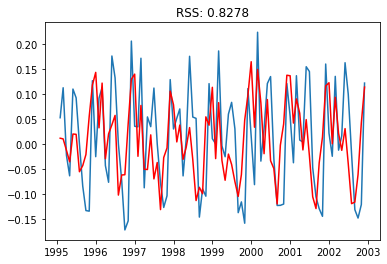

In [118]:
#MA MODEL
model = ARIMA(df_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_log_shift)**2))
print('Auto Regressive model Summary and plot')
print(results_MA.summary())

In [119]:
##Compared to the ARIMA model MA model is performing better for our dataset as the likelyhood is higher, lower AIC and BIC values, p values are significant for MA model, RMSE is less compared to ARIMA model

In [121]:
# Getting predictions
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues,copy = True)
print(predictions_ARIMA_diff.head())

Month
1995-02-01    0.010633
1995-03-01    0.017304
1995-04-01    0.021902
1995-05-01   -0.016025
1995-06-01    0.002952
dtype: float64


In [122]:
## Getting cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1995-02-01    0.010633
1995-03-01    0.027938
1995-04-01    0.049839
1995-05-01    0.033814
1995-06-01    0.036766
dtype: float64


In [123]:
## convert the predicted values to log scale
predictions_ARIMA_log = pd.Series(df_log.iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

Month
2002-08-01    5.700179
2002-09-01    5.687385
2002-10-01    5.676615
2002-11-01    5.684938
2002-12-01    5.701805
dtype: float64

In [124]:
## convert the predicted values from log scale to normal scale
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA.head()

Month
1995-01-01    112.000000
1995-02-01    113.197284
1995-03-01    115.173130
1995-04-01    117.723421
1995-05-01    115.851964
dtype: float64

In [125]:
x = pd.Series(predictions_ARIMA,name = 'passengers_Predicted')
x.to_frame().round()
y = df['Passengers']
z= pd.DataFrame()
z['actual']=y
z['Preddicted']=x
z['residuals']=y-x
z['residual_square']=(y-x)**2

print(z.round())
print('MSE:',"{:.4f}".format(sum(z['residual_square']/len(z))))
print('RMSE:',"{:.4f}".format(np.sqrt(sum(z['residual_square']/len(z)))))

print('RMSE: %.4f'% np.sqrt(sum(z['residual_square']/len(z))))

            actual  Preddicted  residuals  residual_square
Month                                                     
1995-01-01     112       112.0        0.0              0.0
1995-02-01     118       113.0        5.0             23.0
1995-03-01     132       115.0       17.0            283.0
1995-04-01     129       118.0       11.0            127.0
1995-05-01     121       116.0        5.0             27.0
...            ...         ...        ...              ...
2002-08-01     405       299.0      106.0          11253.0
2002-09-01     355       295.0       60.0           3586.0
2002-10-01     306       292.0       14.0            197.0
2002-11-01     271       294.0      -23.0            548.0
2002-12-01     306       299.0        7.0             43.0

[96 rows x 4 columns]
MSE: 1250.4103
RMSE: 35.3611
RMSE: 35.3611


No handles with labels found to put in legend.


Text(0, 0.5, 'no of passengers')

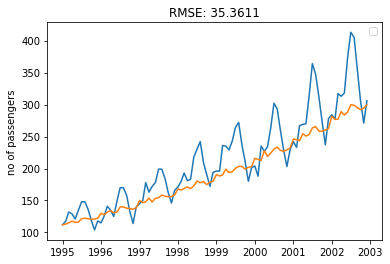

In [126]:
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum(z['residual_square']/len(z))))
plt.legend(loc='best')
plt.ylabel('no of passengers')

In [127]:
## forecast for next 12 months using arima
future_pred = results_AR.predict(start=len(df),end=len(df)+12,typ='levels')

future_pred

future_pred = np.exp(future_pred)
future_pred

2003-01-01    324.351432
2003-02-01    323.622790
2003-03-01    323.197081
2003-04-01    326.737792
2003-05-01    331.033215
2003-06-01    334.710858
2003-07-01    338.152638
2003-08-01    341.712782
2003-09-01    345.382741
2003-10-01    349.089327
2003-11-01    352.820448
2003-12-01    356.589050
2004-01-01    360.400536
Freq: MS, dtype: float64